 Rejection ABC against a simulated target

In [1]:
import sys, os
import copy
join = lambda *x: os.path.abspath(os.path.join(*x))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats

import command
import stats
import pili
import parameters
import _fj
import fjanalysis
import twanalyse
import rtw
import sobol
import abcimplement
import twutils


In [2]:
# config
plt.rcParams.update({
    'text.usetex': False,
    'figure.figsize': (20,20),
    'axes.labelsize': 16
    })


In [3]:
simtarget = "/home/dan/usb_twitching/run/825bd8f/target/t0"
with command.chdir(simtarget):
    ltarget = stats.load()
    args = parameters.thisread()
_simobjective = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate']
simref = {name : twutils.make_get(name)(ltarget) for name in _simobjective}
_interest = ['dwell_time', 'k_spawn', 'pilivar',  'anchor_angle_smoothing_fraction']
print(parameters.describe(args, target=_interest))
simpar = {par : args.pget(par) for par in _interest}

  dwell_time    k_spawn    pilivar    anchor_angle_smoothing_fraction
------------  ---------  ---------  ---------------------------------
           1          5        2.5                               0.15


In [4]:
sim4d = {}
sim4d["simdir"] = "/home/dan/usb_twitching/run/825bd8f/cluster/mc4d"
sim4d["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate', 'fanjin.top.ks_statistic']
sim4d = abcimplement.load_problem_simulation(sim4d)


nan found in lvel.mean. filtering 1 samples
nan found in deviation.var. filtering 1 samples
nan found in qhat.estimate. filtering 1 samples
nan found in ahat.estimate. filtering 1 samples
nan found in fanjin.top.ks_statistic. filtering 1 samples
failed: Counter({'step_condition': 1})
filtered out 1/10000 samples
loaded data from  /home/dan/usb_twitching/run/825bd8f/cluster/mc4d


In [5]:
sim4d["problem"]

{'num_vars': 4,
 'names': ['dwell_time',
  'pilivar',
  'anchor_angle_smoothing_fraction',
  'k_spawn'],
 'bounds': [[0.05, 3.0], [1.0, 15.0], [0.0625, 1.0], [0.1, 8.0]]}

In [6]:
# ABC config
N = 200 


In [7]:
# one statistic at a time
_objectives = _simobjective 
sim4d["params"] = sim4d["data"].paramsdf(_objectives)
statdf, statref = abcimplement.regularise_stats(sim4d["params"], simref, _objectives)

['lvel.mean']
(9999, 1)
['lvel.mean']
N = 200, delta = 0.026768534366402363, target = [0.868608]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['deviation.var']
(9999, 1)
['deviation.var']
N = 200, delta = 0.03396958616301826, target = [1.5506225]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['qhat.estimate']
(9999, 1)
['qhat.estimate']
N = 200, delta = 0.06010077575480555, target = [3.08633346]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['ahat.estimate']
(9999, 1)
['ahat.estimate']
N = 200, delta = 0.05845032673184569, target = [1.50497478]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


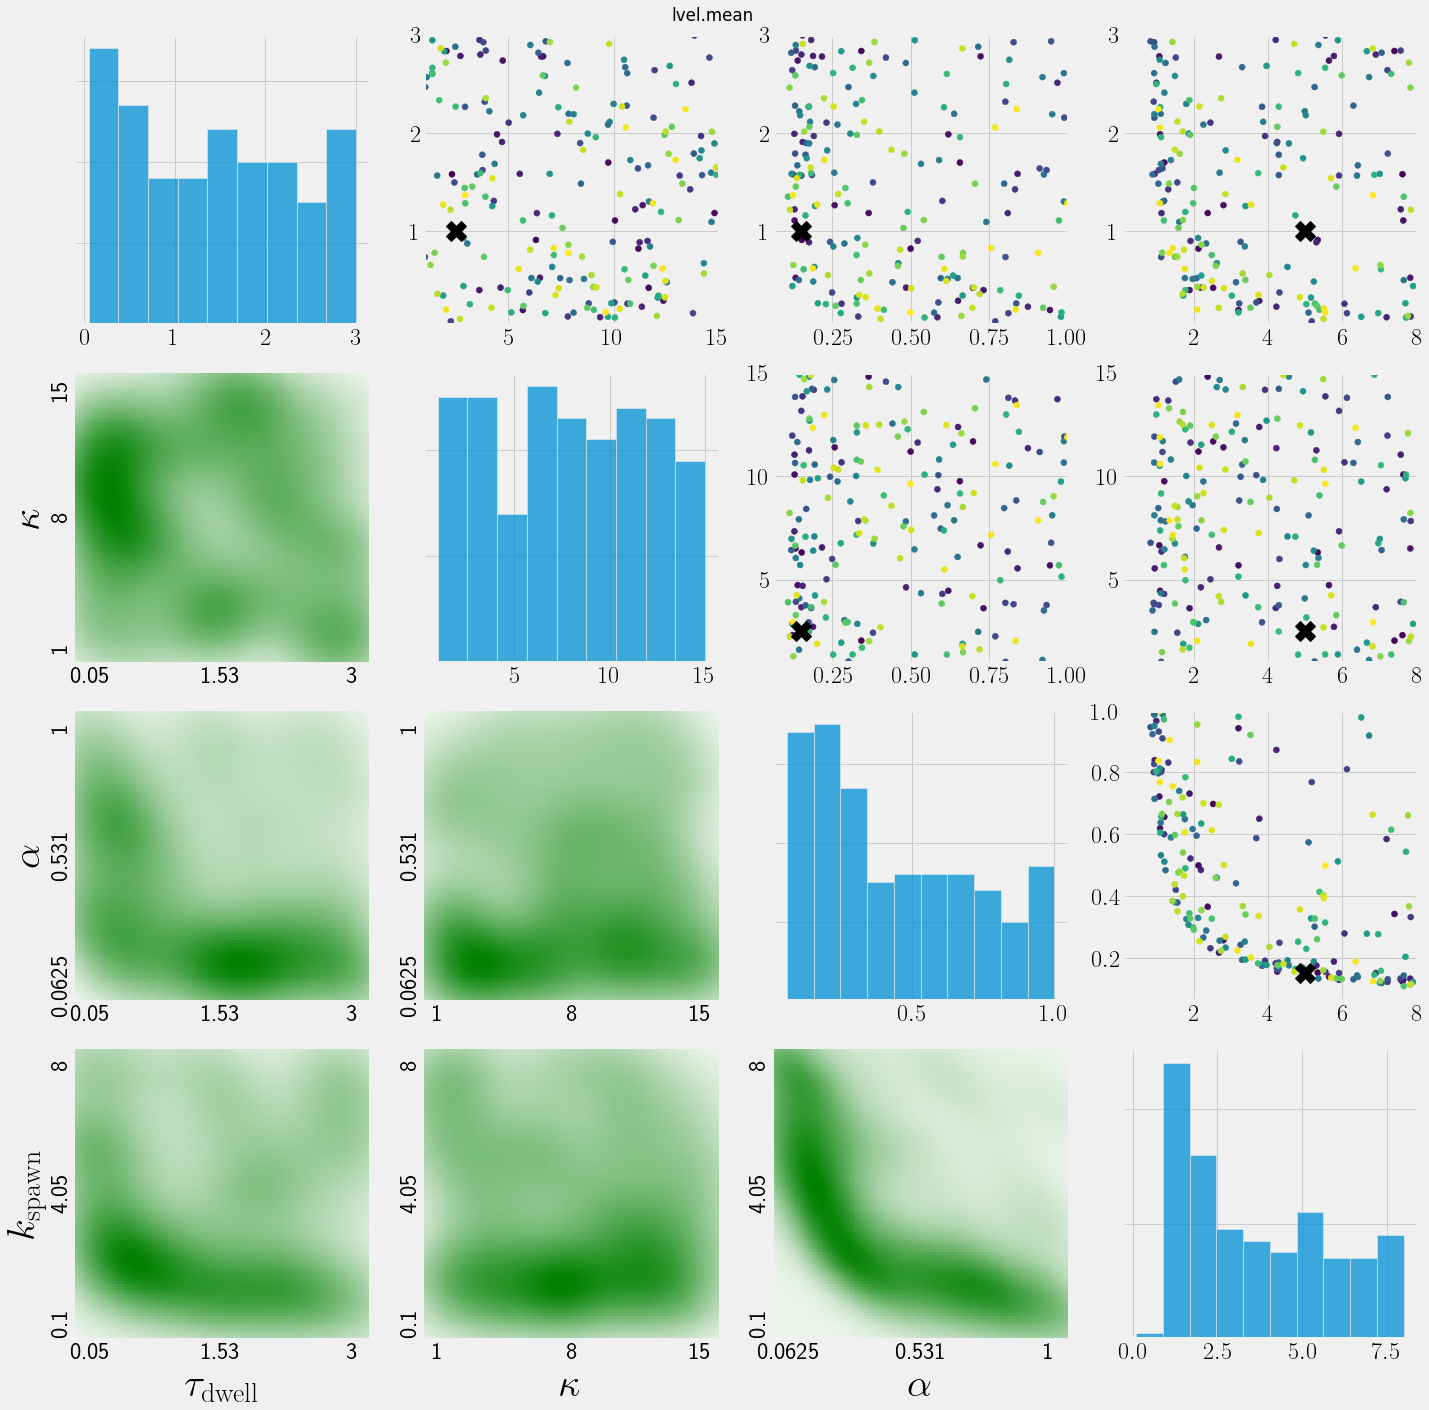

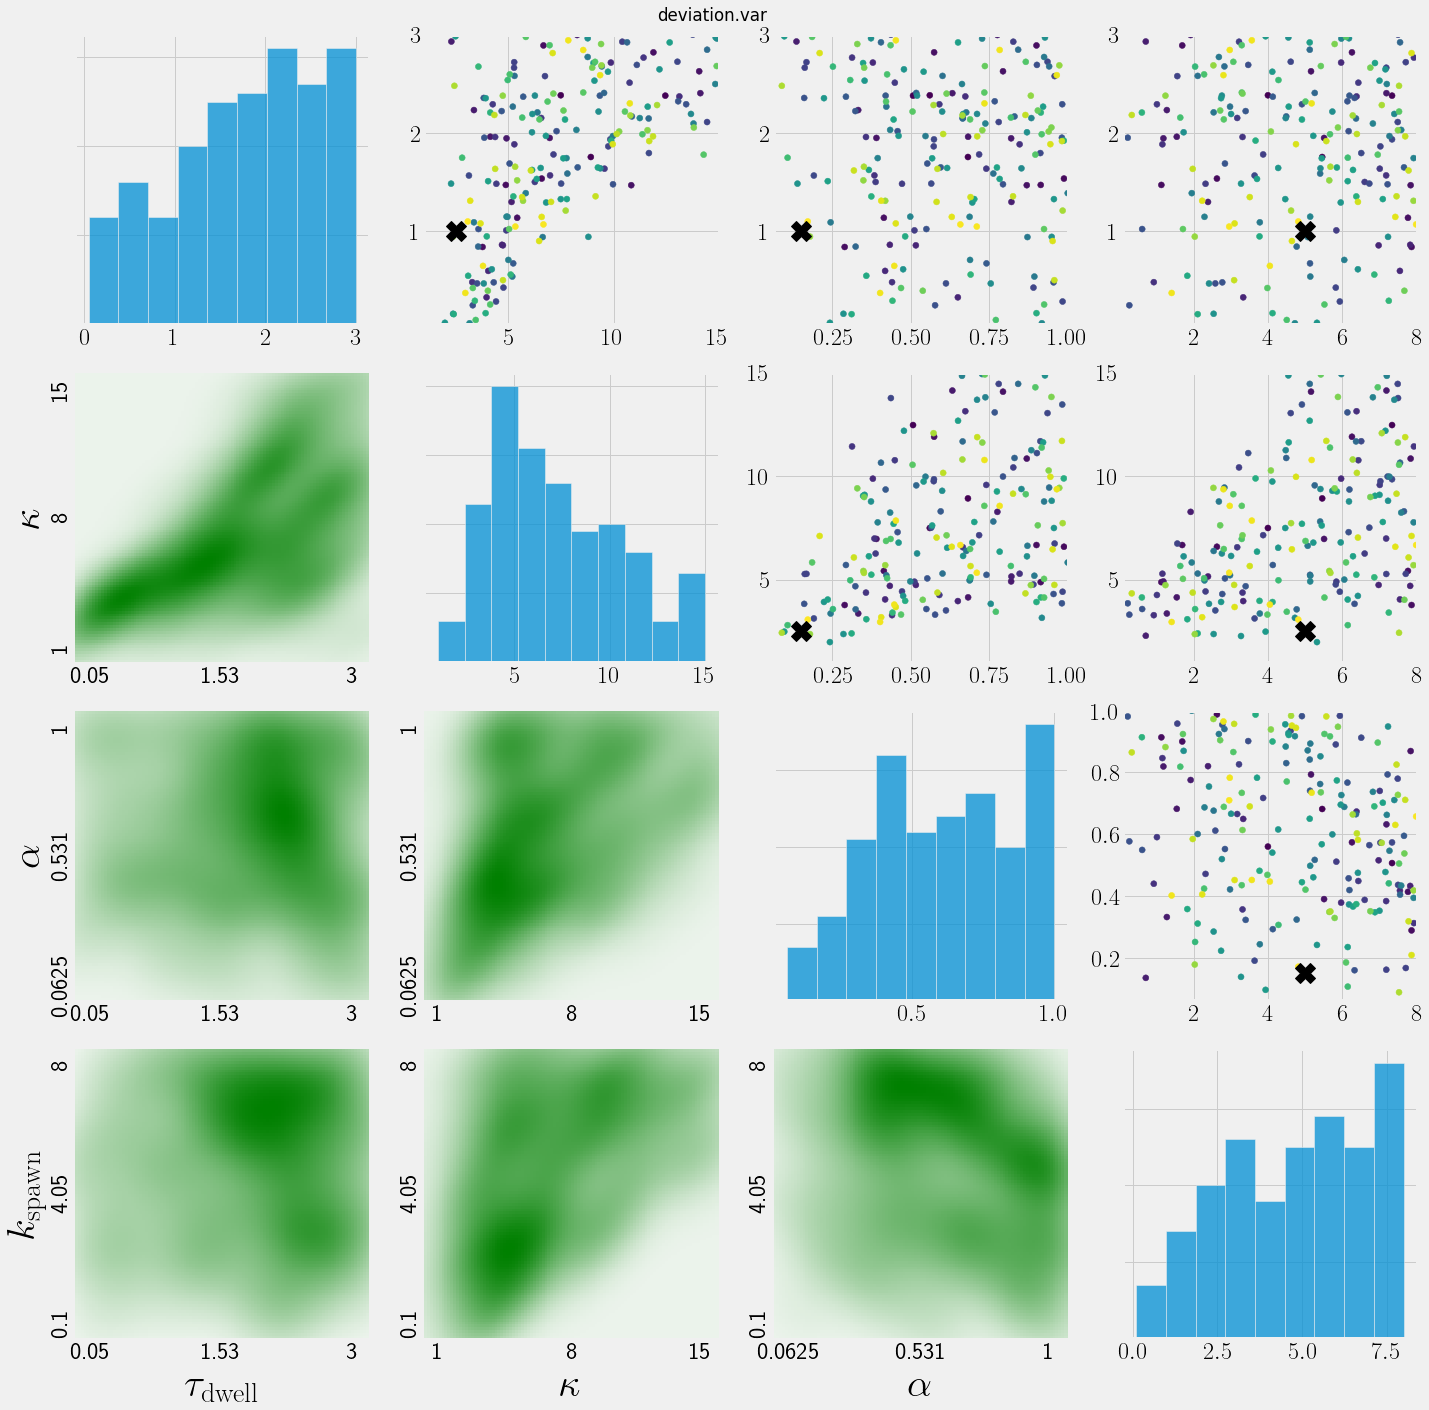

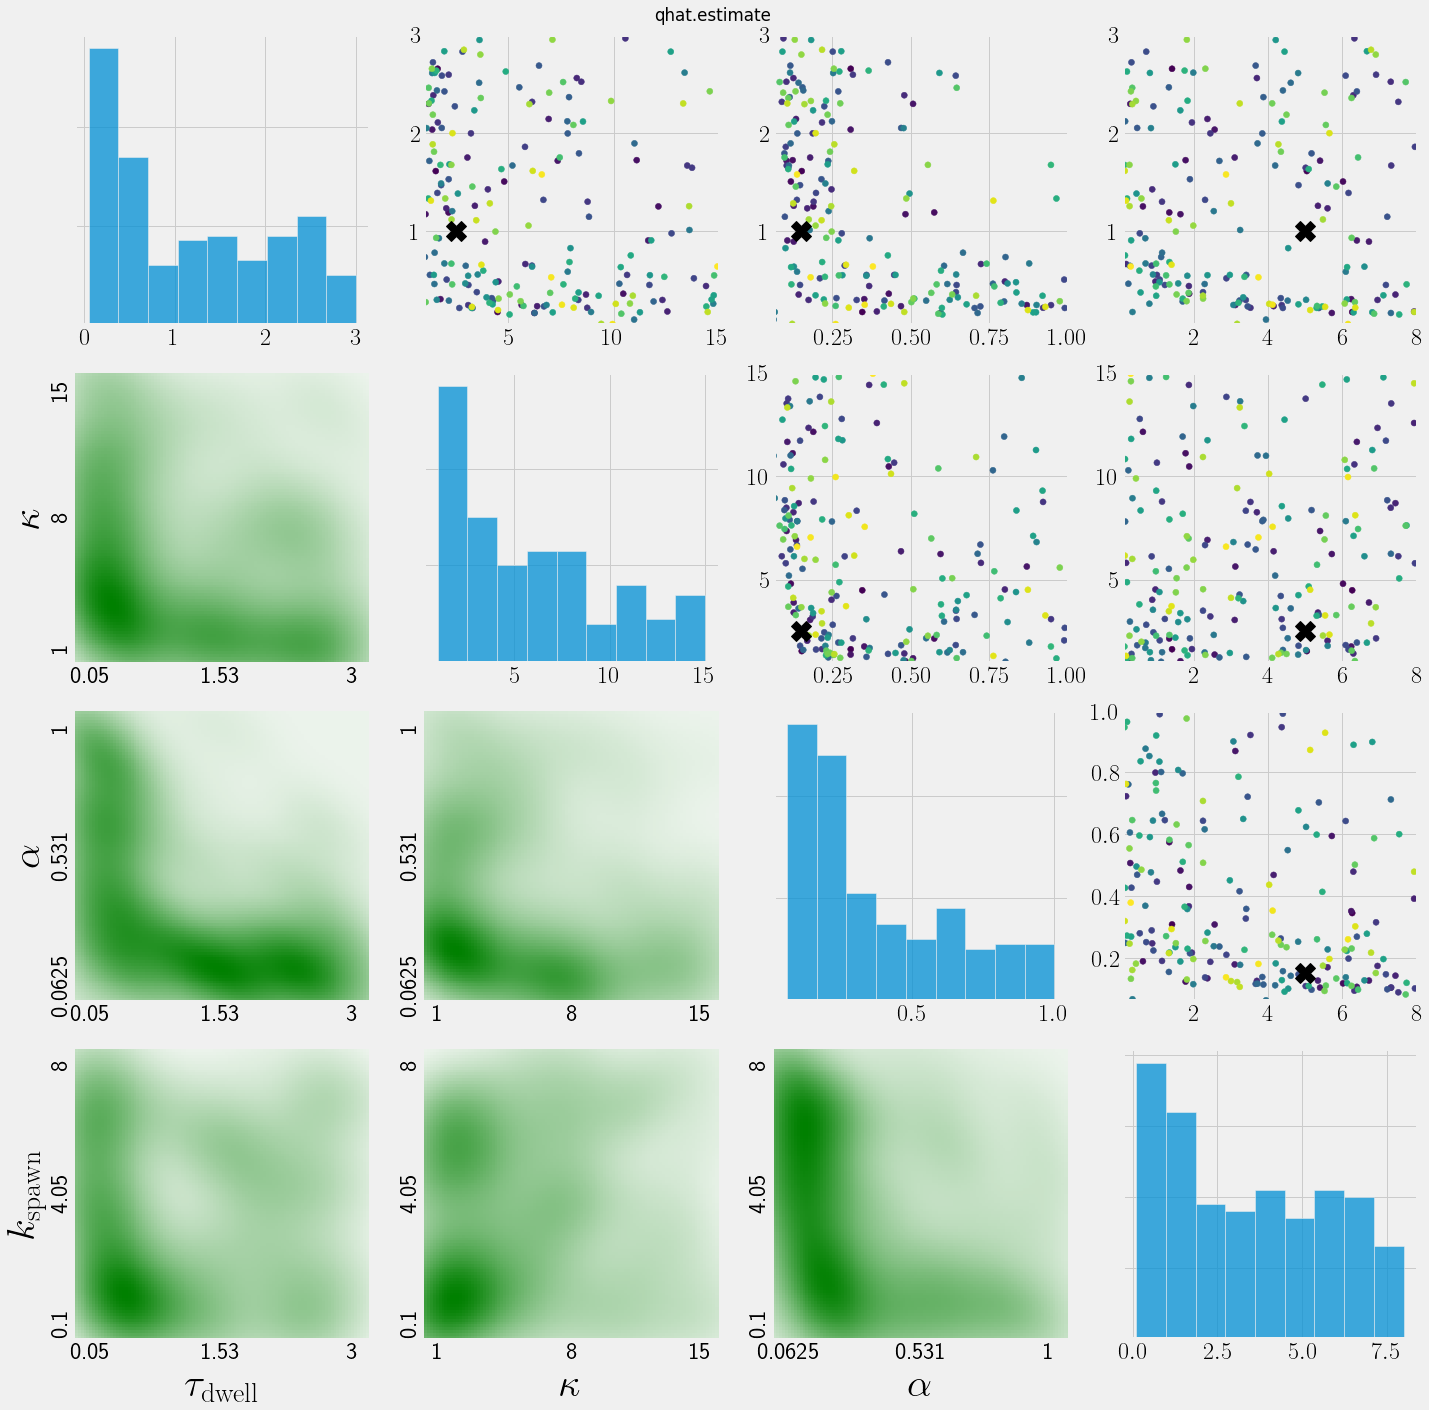

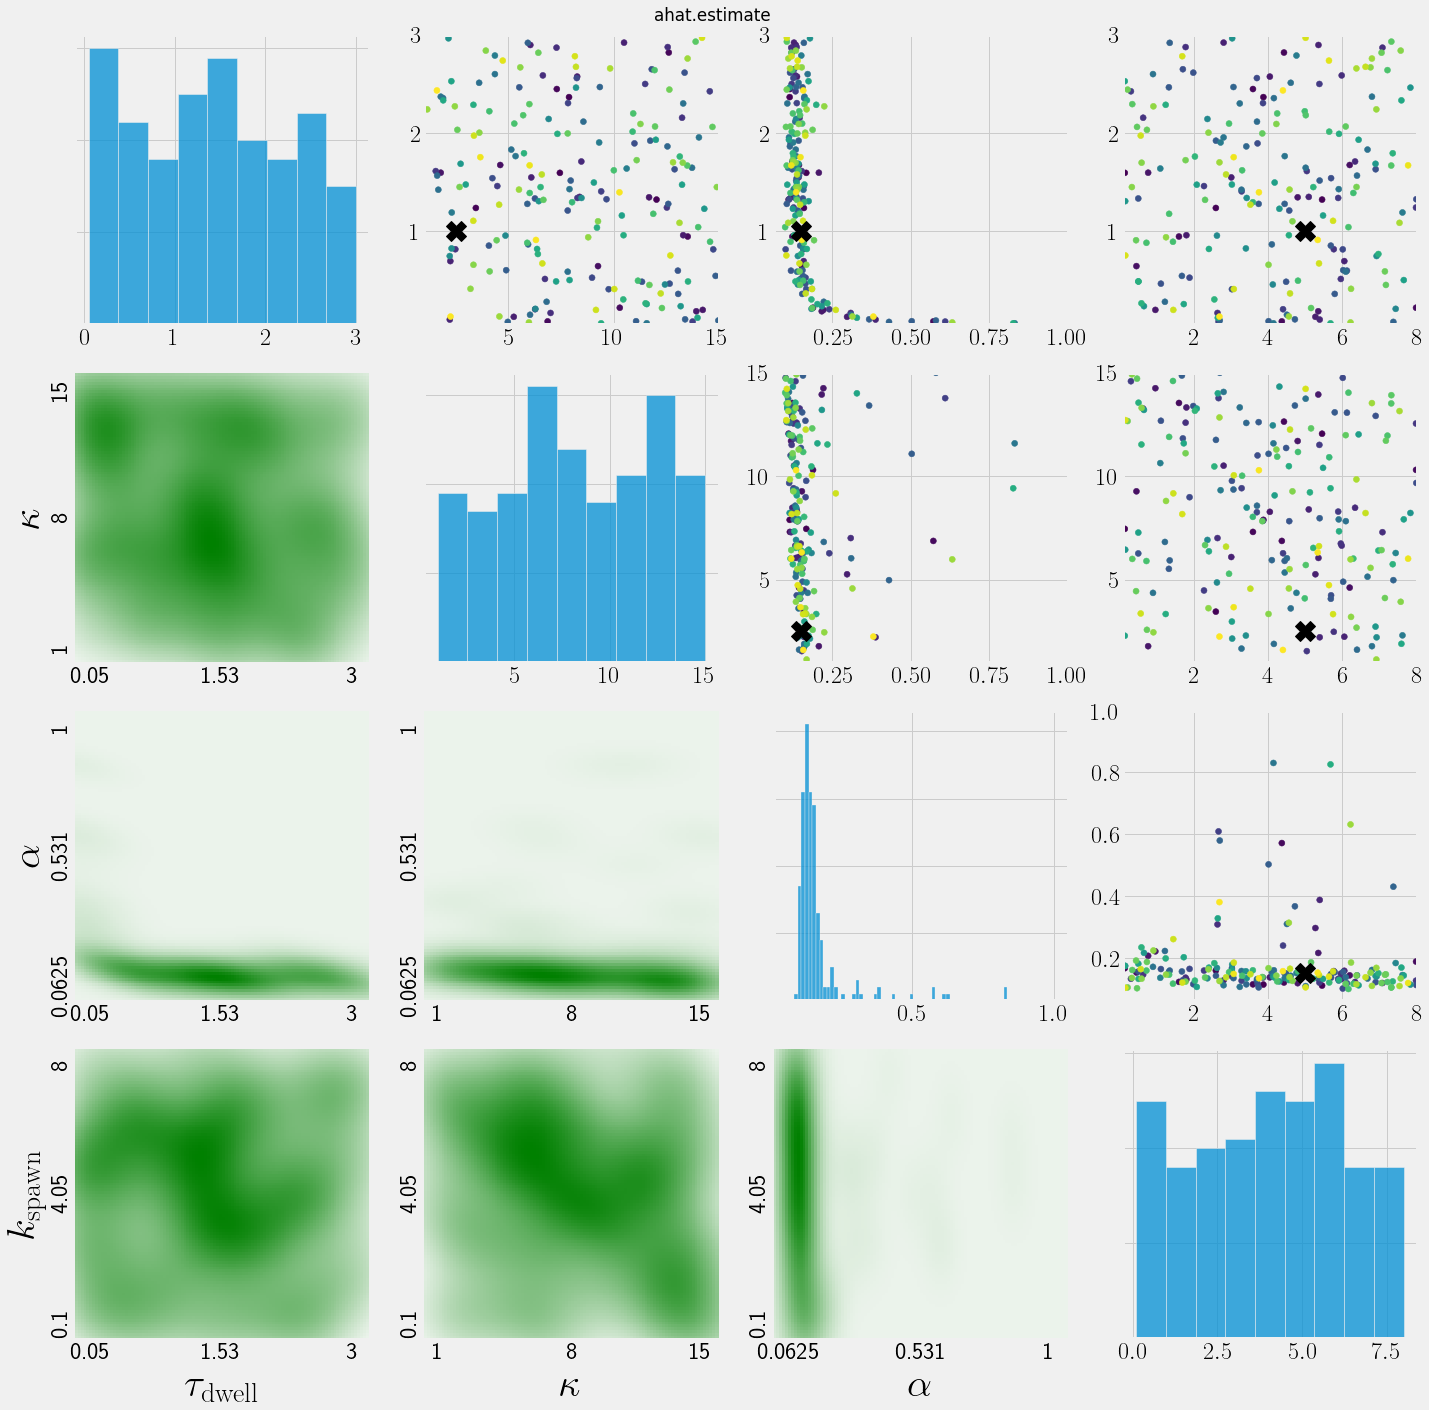

In [8]:
for objective in _objectives:
    _regdf = statdf[sim4d["problem"]["names"] + [objective]]
    _accepted = abcimplement.rejection_abc(_regdf, [objective], statref, N)
    fig, axes = abcimplement.perfectplot4d(sim4d["problem"], _accepted, simpar=simpar)
    fig.suptitle(objective)
    plt.tight_layout()



In [9]:
# all three simple metrics
_objectives = ["lvel.mean", "deviation.var", "ahat.estimate"]
_regdf = statdf[sim4d["problem"]["names"] + _objectives]
_accepted = abcimplement.rejection_abc(_regdf, _objectives, statref, N)

# where to put this utility?
def attr_lims(df, objectives):
    df.attrs['lims'] = {obs : (df[obs].min(), df[obs].max()) for obs in objectives}
    return df
unt_accepted = attr_lims(sim4d["params"].iloc[_accepted.index], _objectives)
unt_accepted.attrs['lims']


['lvel.mean', 'deviation.var', 'ahat.estimate']
(9999, 3)
['lvel.mean', 'deviation.var', 'ahat.estimate']
N = 200, delta = 0.6238684971575561, target = [0.868608   1.5506225  1.50497478]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


{'lvel.mean': (0.020346313655189213, 0.09231373436829199),
 'deviation.var': (0.292201218026444, 0.6637278698794562),
 'ahat.estimate': (0.09132416200315673, 0.19999142006147683)}

(<Figure size 1440x1440 with 16 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='$\\kappa$'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:ylabel='$\\alpha$'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='$\\tau_{\\mathrm{dwell}}$', ylabel='$k_{\\mathrm{spawn}}$'>,
         <AxesSubplot:xlabel='$\\kappa$'>,
         <AxesSubplot:xlabel='$\\alpha$'>, <AxesSubplot:>]], dtype=object))

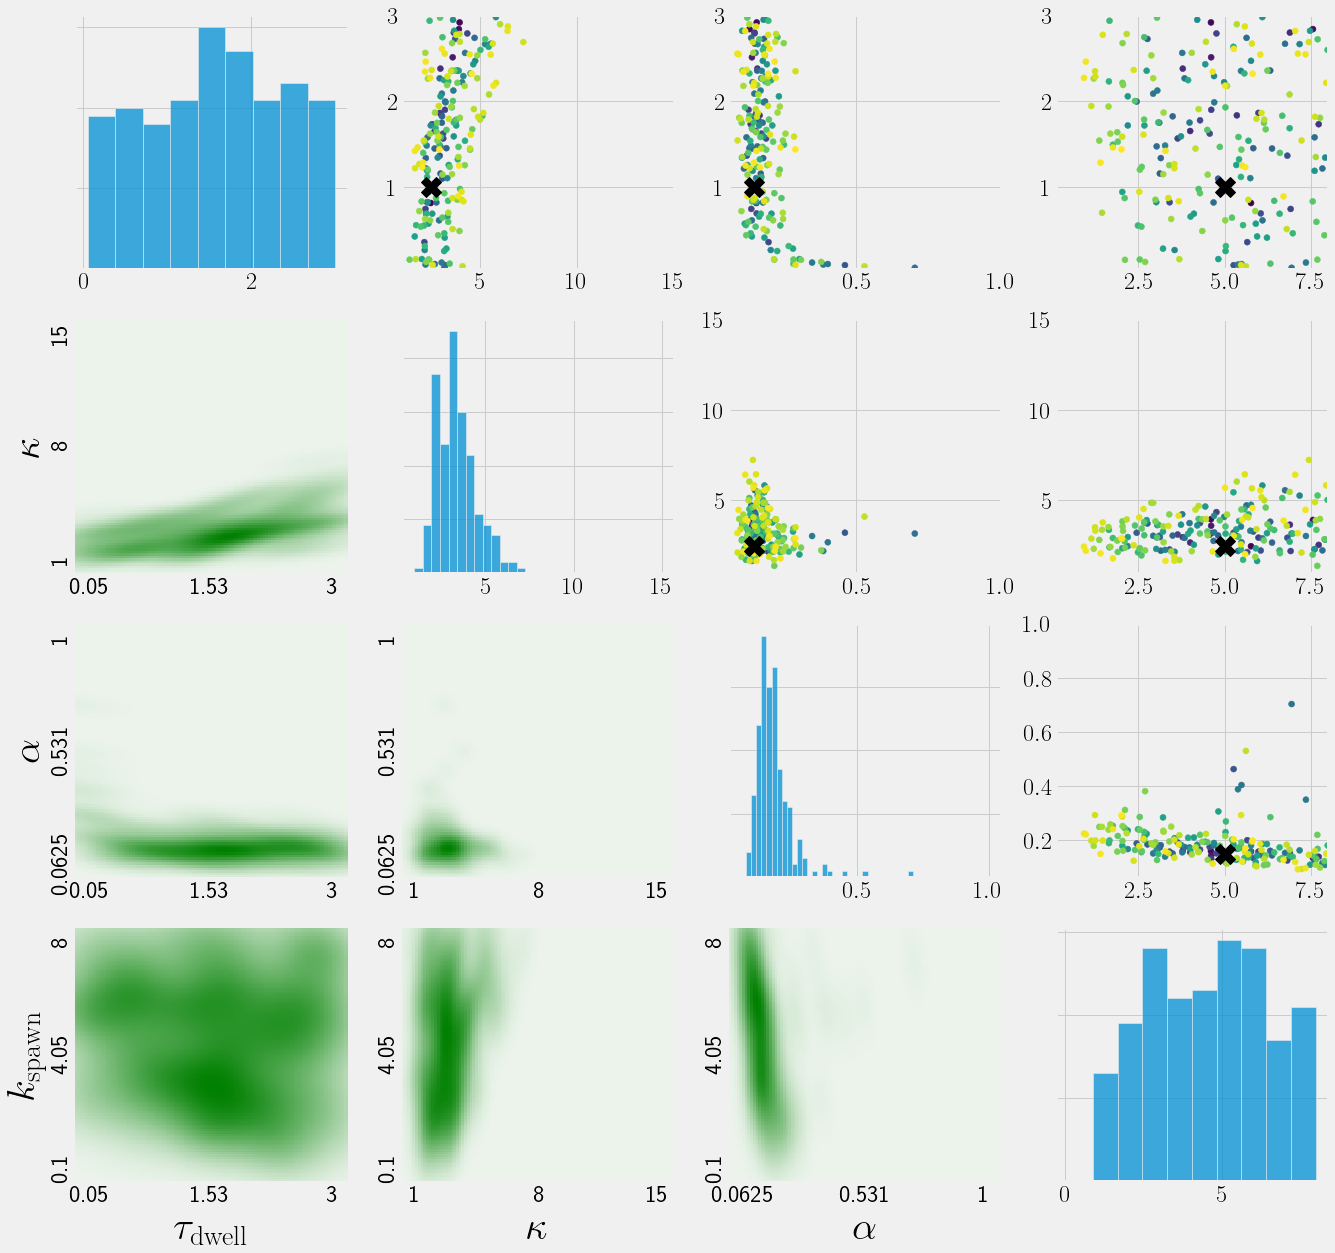

In [10]:
abcimplement.perfectplot4d(sim4d["problem"], _accepted, simpar=simpar)


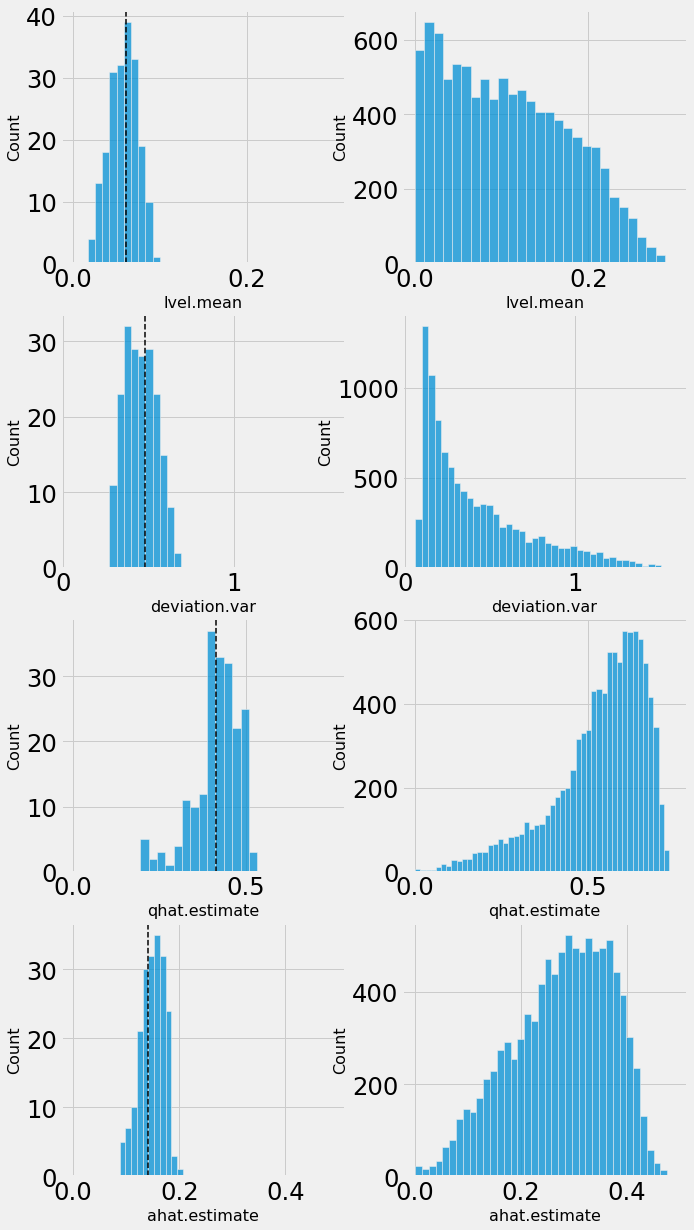

In [11]:
# print 1d summary statistic distributions
_objectives = ["lvel.mean", "deviation.var", "qhat.estimate", "ahat.estimate"]
abcimplement.plot_accepted_stats(sim4d["params"], _accepted, _objectives, simref)


In [12]:
# so despite having k_spawn << 1 and alpha small, we can achieve mean of at least 0.02 microns/s
# lets look at this in more detail
unt_accepted.sort_values('k_spawn')




,uid,dwell_time,pilivar,anchor_angle_smoothing_fraction,k_spawn,lvel.mean,deviation.var,qhat.estimate,ahat.estimate
5899,_u_39gz0NRS,2.268800,2.448818,0.223948,0.921278,0.022407,0.564755,0.416752,0.146100
8430,_u_9zJrzCRq,2.457732,2.216480,0.220572,0.975455,0.024377,0.538894,0.373610,0.166776
58,_u_Qf1sAvp0,1.942115,2.890654,0.197279,1.134768,0.026081,0.415452,0.362093,0.161024
6241,_u_lFa8I7OY,2.260890,2.328591,0.178260,1.204954,0.023866,0.502344,0.383617,0.155334
8878,_u_qpO0k8yY,2.346925,3.519089,0.292098,1.241105,0.039782,0.408750,0.472411,0.183269
...,...,...,...,...,...,...,...,...,...
21,_u_F35hIn7v,1.214741,2.241692,0.114522,7.837636,0.062743,0.527256,0.405756,0.117026
7666,_u_S6gnk0Ob,0.438617,2.857593,0.122252,7.895479,0.059956,0.349161,0.389100,0.117258
8023,_u_qYXltT7F,1.341507,2.835770,0.107724,7.917462,0.058427,0.421448,0.401713,0.114011
3986,_u_EPqPZldj,2.211172,5.836469,0.149216,7.946771,0.086549,0.346276,0.469623,0.158944


In [13]:
statdf.attrs['std']

{'lvel.mean': 0.0702688796044588,
 'deviation.var': 0.31113147275630193,
 'qhat.estimate': 0.1343752361814738,
 'ahat.estimate': 0.09403116839649117}

In [14]:
# relationships between summary statistics in accepted samples?
# fig, ax = plt.subplots(figsize=(5,5))
# sns.scatterplot(data=unt_accepted, x="deviation.var", y="ahat.estimate", ax=ax)

